# 1. IMPORTACIÓN DE LIBRERIAS

In [759]:
import pandas as pd 
from matplotlib import pyplot as plt
import datetime
from scipy import stats as st

# 2. IMPORTACION DE ARCHIVOS Y RECONOCIMIENTO DE DATOS

In [760]:
df_trips = pd.read_csv('moved_project_sql_result_01.csv')
df_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [761]:
df_location = pd.read_csv('moved_project_sql_result_04.csv')
df_location.head(5)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


# 3. TIPOS DE DATOS DE CADA DATA FRAME

In [762]:
# Verificación de tipos de datos y existencia de datos ausentes

df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [763]:
df_trips['company_name'].value_counts()

company_name
Flash Cab                      1
Taxi Affiliation Services      1
Norshore Cab                   1
6742 - 83735 Tasha ride inc    1
3591 - 63480 Chuks Cab         1
                              ..
Gold Coast Taxi                1
Service Taxi Association       1
5 Star Taxi                    1
303 Taxi                       1
3556 - 36214 RC Andrews Cab    1
Name: count, Length: 64, dtype: int64

Son 64 empresas registradas con servicio de transporte prestado entre el 16 y 17 de Noviembre de 2017 en la ciudad de Chicago.

In [764]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


El data frame Trips, tiene 2 columnas con 64 datos cada uno. La columna Company_name es de tipo string y la columna trips_amount de tipo entero.
El data frame location, tiene 2 columnas con 94 datos cada uno. La columna dropoff_location_name es de tipo string y la columnaaverage_trips de tipo decimal.
No se persive ningún cambio a realizar en los datasets.

In [765]:
df_location['dropoff_location_name'].value_counts()

dropoff_location_name
Loop               1
Chatham            1
Clearing           1
Auburn Gresham     1
Washington Park    1
                  ..
Albany Park        1
Wicker Park        1
Avondale           1
Hyde Park          1
Riverdale          1
Name: count, Length: 94, dtype: int64

Son 94 destinos diferentes en los servicios prestados entre el 16 y 17 de Noviembre de 2017 en la ciudad de Chicago.

# 4. ANALISIS DE DATOS 

## 4.1  Diez principales barrios en chicago como punto de llegada entre el 16 y 17 de Noviembre de 2017.

In [766]:
total_average_trips =df_location['average_trips'].sum()
df_location['Participation'] = (df_location['average_trips']/total_average_trips) *100
df_location.head(10).round(2)

,dropoff_location_name,average_trips,Participation
0,Loop,10727.47,19.02
1,River North,9523.67,16.89
2,Streeterville,6664.67,11.82
3,West Loop,5163.67,9.16
4,O'Hare,2546.90,4.52
5,Lake View,2420.97,4.29
6,Grant Park,2068.53,3.67
7,Museum Campus,1510.00,2.68
8,Gold Coast,1364.23,2.42
9,Sheffield & DePaul,1259.77,2.23


<Axes: title={'center': '10 Principales barrios en los que finaliza el recorrido entre el 16 y 17 de Noviembre de 2017'}, xlabel='dropoff_location_name'>

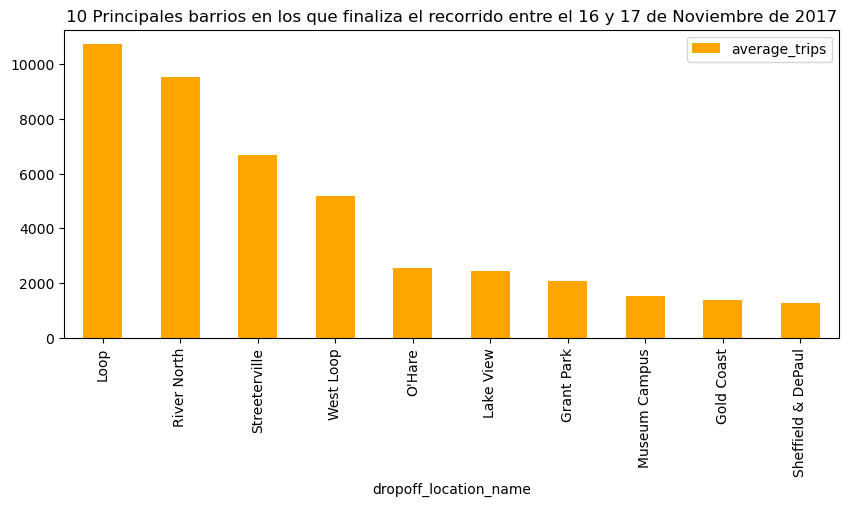

In [767]:
df_location.head(10).plot(x = 'dropoff_location_name',
                 y = 'average_trips',
                 kind = 'bar',
                 figsize = [10,4],
                 color = 'orange',
                title = '10 Principales barrios en los que finaliza el recorrido entre el 16 y 17 de Noviembre de 2017')

Loop, River North, Streeterville y West Loop son los barrios como punto de llegada con más 50% del promedio de los viajes realizados en Chicago durante el 16 y 17 de Noviembre del año 2017. Los 4 barrios relativamente pequeños y cercanos, están ubicados sobre la costa de Lake Michigan, la cual esta opuesta a la ubicación de los aeropuertos de la ciudad de Chicago.

## 4.2 Diez principales compañias de taxis en chicago con mayores número de viajes realizados entre el 16 y 17 de Noviembre de 2017

In [768]:
total_trips = df_trips['trips_amount'].sum()
df_trips['Participation'] = (df_trips['trips_amount']/total_trips) *100
df_trips.head(10).round(2)

,company_name,trips_amount,Participation
0,Flash Cab,19558,14.24
1,Taxi Affiliation Services,11422,8.32
2,Medallion Leasin,10367,7.55
3,Yellow Cab,9888,7.20
4,Taxi Affiliation Service Yellow,9299,6.77
5,Chicago Carriage Cab Corp,9181,6.69
6,City Service,8448,6.15
7,Sun Taxi,7701,5.61
8,Star North Management LLC,7455,5.43
9,Blue Ribbon Taxi Association Inc.,5953,4.34


<Axes: title={'center': '10 Principales compañias de taxis en chicago entre el 16 y 17 de Noviembre de 2017'}, xlabel='company_name'>

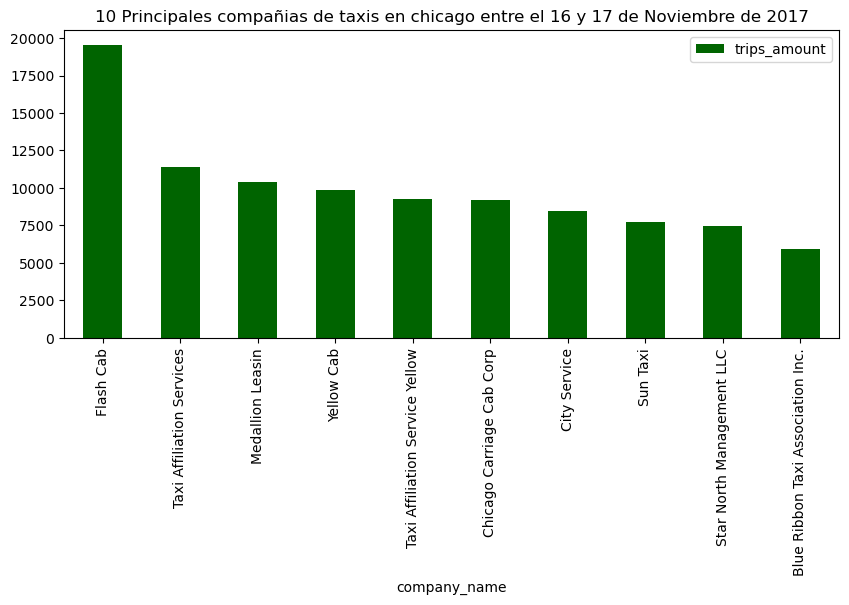

In [769]:
df_trips.head(10).plot(x = 'company_name',
                        y = 'trips_amount',
                        kind = 'bar',
                        figsize = [10,4],
                        color = 'darkgreen',
                        title = '10 Principales compañias de taxis en chicago entre el 16 y 17 de Noviembre de 2017')

De las 64 compañias que registraron viajes en la ciudad de Chicago entre el 16 al 17 de Noviembre de 2017, Flash Cab (14.24%), Tax Affiliations Services (8,32%), Medallion Leasin (7,55%) y Yellow cab (7,20%) fueron las de mayor cantidad de servicios sumando entre ellas casi el 40% del total de los viajes.

# 5. ANÁLISIS VIAJES DESDE EL LOOP HASTA EL AEROPUESTO INTERNATINAL O'HARE.

In [770]:
df_loop = pd.read_csv('moved_project_sql_result_07.csv')
df_loop['start_ts'] = pd.to_datetime(df_loop['start_ts'], format = '%Y-%m-%d %H:%M:%S')
df_loop.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


## 5.1 Verificación de tipos de datos y existencia de datos ausentes

In [771]:
df_loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


No hay valores ausentes y la columna 'start_ts' que estaba como string se convirtió a tipo datetime para realizar la extracctión de los días.

## 5.2 Descripción de los datos

In [772]:
df_loop['day'] = df_loop['start_ts'].dt.day
df_loop.groupby('weather_conditions')['day'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
weather_conditions,,,,,,,,
Bad,180.0,12.0,7.0,4.0,4.0,18.0,18.0,18.0
Good,888.0,11.0,6.0,4.0,4.0,11.0,11.0,25.0


El 83% de los servicios se realizaron los días sábados con buenas condiciones climáticas.

# 6. PRUEBA DE HIPOTESIS

## 6.1 PRUEBA DE LEVENE

H0: Todos los días tienen varianzas iguales

H1: Todos los días tienen varianzas diferentes

In [773]:
good = df_loop.query("weather_conditions == 'Good'")['duration_seconds']
bad = df_loop.query("weather_conditions == 'Bad'")['duration_seconds']

alpha = 0.05
result_var = st.levene(good, bad)
print('Valor p:', result_var.pvalue)

Valor p: 0.5332038671974493


In [774]:
if result_var.pvalue < alpha:
    print('Rechazamos la hipótesis nula. Las varianzas de ambas condiciones climáticas son diferentes')
else:
    print('No podemos rechazar la hipótesis nula.')

No podemos rechazar la hipótesis nula.


## 6.2 PRUEBA DE HIPOTESIS

Ho: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual todos los días.

H1: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

In [775]:
varianza = df_loop.groupby('weather_conditions')['duration_seconds'].var().round(2)
varianza

weather_conditions
Bad     520294.09
Good    576382.01
Name: duration_seconds, dtype: float64

In [776]:
result_h1 = st.ttest_ind(good, bad, equal_var = True)
print('Valor p:', result_h1.pvalue)

Valor p: 6.517970327099473e-12


In [777]:
if result_h1.pvalue < alpha:
    print("Rechazamos la hipótesis nula. La duración promedio de los viajes desde el Loop hasta el aeropuerto O'Hare cambia los sábados lluviosos.")
else:
    print('No podemos rechazar la hipótesis nula')

Rechazamos la hipótesis nula. La duración promedio de los viajes desde el Loop hasta el aeropuerto O'Hare cambia los sábados lluviosos.


# 7. CONCLUSIONES

1. Las 3 bases de datos dadas están compuestas con datos de los servicios prestados de las empresas de transporte de en la ciudad de Chicago en el mes de Noviembre, pero no hay una llave primaria que con las que se puedan relacionar y obtener un análisis más extenso.

2. En el dataframe df_trips, podemos concluir que el 50% de los servicios prestados se concentran en las 6 primeras empresas, y el restante 50% entre las otras 58, esto podría deberse a la cantidad de vehículos resgistrados y disponibles en cada una de las empresas. 

3. En el dataframe df_locations, tenermos 94 destinos diferentes de llegada en los servicios prestados durante los días 16 de y 17 de Noviembre, pero en 50% de llegadas se concentran en 4 barrios Loop, River North, Streeterville y West Loop. 

4. EN el dataframe df_loop, análizamos los viajes realizados desde el barrio Loop hasta el aeropuerto international O'Hare los días sábado 4,11,18 y 25 de noviembre de 2017. Más del 80% de los servicios tuvieron buenas condiciones climáticas (sin llluvia), pero los días sábado con lluvia tuvo viajes con mayor promedio en la duración de los mismos, algo relativamente normal y esperado, debido a que las velocidad de manejo debe disminuir y el uso de vehiculos para el desplazamiento aumenta.